In [1]:
import os
import re

from sxfst.utils import plotTraces, plot_set, proc, parse, Screen, PlateData, Cpd


dataDir = 'platereader'
paths = sorted([os.path.join(dataDir, i) for i in os.listdir(dataDir)])
test_paths = list(filter(lambda s : '16032022' in s, paths))
from ast import literal_eval
import numpy as np
from scipy.ndimage import gaussian_filter1d, convolve1d
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')
import seaborn as sns

from sxfst.utils import plotTraces, plot_set, proc, parse, Screen, PlateData, Cpd

dataDir = 'platereader'
paths = sorted([os.path.join(dataDir, i) for i in os.listdir(dataDir)])
test_paths_ = list(filter(lambda s : '16032022' in s, paths)) # 4 extra files with long names
test_paths  = list(filter(lambda s : len(s) < 44, test_paths_))
ctrl_paths = list(filter(lambda s : '12032022' in s, paths))

p0 = PlateData(test_paths[0])
p0

platereader/16032022,104721.CSV
User: USER,Path: C:\Program Files (x86)\BMG\CLARIOstar\User\Data\,Test run no.: 2828

 1  2  3  4  5  6  7  8  9  10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
A :  :  :  :  :  :  :  :  :  :  :  :  :  :  :  :  :  :  :  :  :  :  :  : 
B :  :  :  :  :  :  :  :  :  :  :  :  :  :  :  :  :  :  :  :  :  :  :  : 
C :  :  :  :  :  :  :  :  :  :  :  :  :  :  :  :  :  :  :  :  :  :  :  : 
D :  :  :  :  :  :  :  :  :  :  :  :  :  :  :  :  :  :  :  :  :  :  :  : 
E :  :  :  :  :  :  :  :  :  :  :  :  :  :  :  :  :  :  :  :  :  :  :  : 
F :  :  :  :  :  :  :  :  :  :  :  :  :  :  :  :  :  :  :  :  :  :  :  : 
G :  :  :  :  :  :  :  :  :  :  :  :  :  :  :  :  :  :  :  :  :  :  :  : 
H :  :  :  :  :  :  :  :  :  :  :  :  :  :  :  :  :  :  :  :  :  :  :  : 
I :  :  :  :  :  :  :  :  :  :  :  :  :  :  :  :  :  :  :  :  :  :  :  : 
J :  :  :  :  :  :  :  :  :  :  :  :  :  :  :  :  :  :  :  :  :  :  :  : 
K :  :  :  :  :  :  :  :  :  :  :  :  :  :  :  :  :  :  :  :  :  :  :

In [2]:
picklist = pd.read_csv('echo/picklists/2022-03-12-00.3-picklist.csv',
                      index_col=0)
wells = {i:picklist.loc[picklist.Cpd == i, :] \
         for i in picklist.Cpd.unique()}
wells["['S1005']"]

,SrcPlate,Cpd,SrcWell,Destination Plate Name,DestWell,Transfer Volume /nl
0,src racks 0..4,['S1005'],A1,dest racks 0..4 0,A1,20.0
1,src racks 0..4,['S1005'],A1,dest racks 0..4 0,A2,605.0
2,src racks 0..4,['S1005'],A1,dest racks 0..4 0,A3,2000.0


In [3]:
pklplatenames = sorted(picklist['Destination Plate Name'].unique())
pklplatenames

['dest racks 0..4 0',
 'dest racks 0..4 1',
 'dest racks 0..4 2',
 'dest racks 0..4 3',
 'dest racks 4..8 0',
 'dest racks 4..8 1',
 'dest racks 4..8 2',
 'dest racks 4..8 3',
 'dest racks 8..12 0',
 'dest racks 8..12 1',
 'dest racks 8..12 2']

In [4]:
def mapPlateName(s):
    assert s in pklplatenames
    d = dict(zip(pklplatenames, zip(test_paths, ctrl_paths)))
    return d[s]

mapPlateName(pklplatenames[0])

('platereader/16032022,104721.CSV', 'platereader/12032022,161043.CSV')

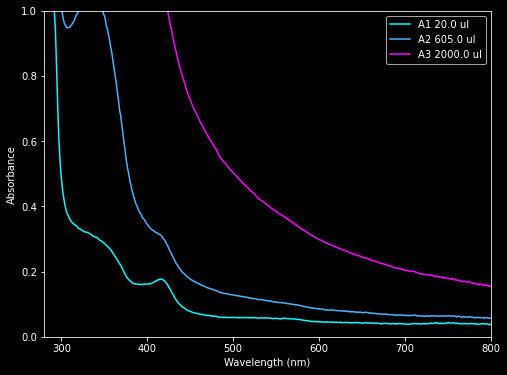

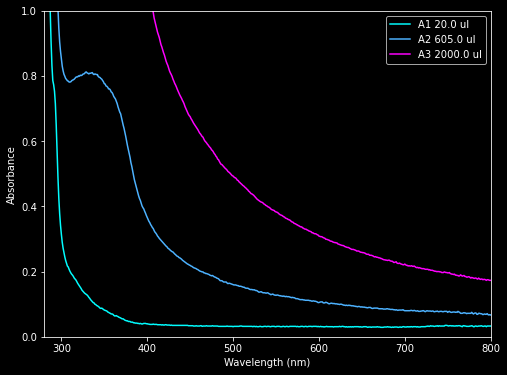

In [6]:
t0_, c0_ = mapPlateName(pklplatenames[0])
t0 = PlateData(t0_)
c0 = PlateData(c0_)

pkl0 = picklist.loc[picklist['Destination Plate Name'] == pklplatenames[0], :]

for i in pkl0['Cpd'].unique():
    cpdPkl = pkl0.loc[pkl0['Cpd'] == i, :]
    wells_ = list(cpdPkl['DestWell'])
    for j in [t0, c0]:
        wells = j[wells_]
        vols = cpdPkl['Transfer Volume /nl']
        plotTraces(wells,
                   vols=vols,
                   size=(8,6),
                   title=i,
                  )
    break

In [ ]:
t0.df